In [25]:
import os

import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

image_path = './Images/train'
fruits = ['apple',
          'banana',  
          'beetroot',
          'bell pepper',
          'cabbage',
          'capsicum',
          'carrot',
          'cauliflower',
          'chilli pepper',
          'corn',
          'cucumber',
          'eggplant',
          'garlic',
          'ginger',
          'grapes',
          'jalepeno',
          'kiwi',
          'lemon',
          'lettuce',
          'mango',
          'onion',
          'orange',
          'paprika',
          'pear',
          'peas',
          'pineapple',
          'pomegranate',
          'potato',
          'raddish',
          'soy beans',
          'spinach',
          'sweetcorn',
          'sweetpotato',
          'tomato',
          'turnip',
          'watermelon']

# Count the number of images in each class
num_images = []

for fruit in fruits:
    path = image_path + '/' + fruit
    num_images.append(len([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]))

for i in range(len(fruits)):
    print(fruits[i], num_images[i])

apple 68
banana 75
beetroot 88
bell pepper 90
cabbage 92
capsicum 89
carrot 82
cauliflower 79
chilli pepper 87
corn 87
cucumber 94
eggplant 84
garlic 92
ginger 68
grapes 100
jalepeno 88
kiwi 88
lemon 82
lettuce 97
mango 86
onion 94
orange 69
paprika 83
pear 89
peas 100
pineapple 99
pomegranate 79
potato 77
raddish 81
soy beans 97
spinach 97
sweetcorn 91
sweetpotato 69
tomato 92
turnip 98
watermelon 84


In [26]:
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    image_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    image_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)


AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

normalization_layer = layers.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

Found 3115 files belonging to 36 classes.
Using 2492 files for training.
Found 3115 files belonging to 36 classes.
Using 623 files for validation.
['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']
0.0 1.0


In [27]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

model.summary()
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

c:\Users\houst\OneDrive\Documents\GitHub\Computer_Architecture_Final\.venv\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_8 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,993,284 (15.23 MB)

 Trainable params: 3,993,284 (15.23 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 14s 170ms/step - accuracy: 0.0532 - loss: 3.5166 - val_accuracy: 0.1413 - val_loss: 3.0254
Epoch 2/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 12s 152ms/step - accuracy: 0.2103 - loss: 2.7386 - val_accuracy: 0.2472 - val_loss: 2.5414
Epoch 3/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 12s 152ms/step - accuracy: 0.3585 - loss: 2.1993 - val_accuracy: 0.3114 - val_loss: 2.2962
Epoch 4/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 12s 154ms/step - accuracy: 0.4416 - loss: 1.9051 - val_accuracy: 0.3563 - val_loss: 2.2181
Epoch 5/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 12s 156ms/step - accuracy: 0.5481 - loss: 1.5220 - val_accuracy: 0.3724 - val_loss: 2.1609
Epoch 6/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 12s 159ms/step - accuracy: 0.6774 - loss: 1.1163 - val_accuracy: 0.3724 - val_loss: 2.3551
Epoch 7/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 12s 160ms/step - accuracy: 0.7936 - loss: 0.7338 - val_accuracy: 0.3933 - val_loss: 2.5560
Epoch 8/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 12s 160ms/step - accuracy: 0.8904 - loss: 0.4109 - val_accu

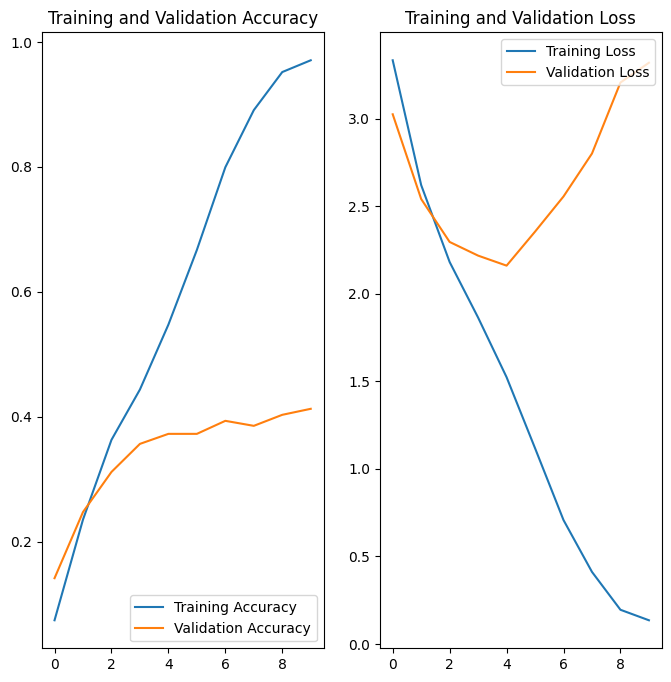

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [29]:
# Save the model
model.save('model.keras')
